TMM results outputted as netcdf files using /home/ph290/tmm/load_output_with_restarts.m

grid files and example files from:
https://ecco-v4-python-tutorial.readthedocs.io/Downloading_the_ECCO_v4_state_estimate.html

https://ecco-v4-python-tutorial.readthedocs.io/Installing_Python_and_Python_Packages.html

In [1]:
import numpy as np
import xarray as xr
import sys
import matplotlib.pyplot as plt
import iris

import sys
sys.path.append('/Users/ph290/ECCOv4-py')
import ecco_v4_py as ecco

In [2]:
## Set top-level file directory for the ECCO NetCDF files
## =================================================================
# base_dir = '/home/username/'
base_dir = '/Users/ph290/Downloads/'

## define a high-level directory for ECCO fields
ECCO_dir = base_dir + '/Release3_alt/'

## define the directory with the model grid
grid_dir = ECCO_dir + 'nctiles_grid/'

## load the grid
grid = ecco.load_ecco_grid_nc(grid_dir, 'ECCOv4r3_grid.nc')

salt_dir = ECCO_dir + '/nctiles_monthly/SALT/'
salt_dataset = xr.open_dataset(salt_dir + '/SALT_1992.nc')

In [16]:
dic1 = iris.load('/Users/ph290/Downloads/ecco4/DIC_1400_f1.nc')
dic2 = iris.load('/Users/ph290/Downloads/ecco4/DIC_1400_f2.nc')
dic3 = iris.load('/Users/ph290/Downloads/ecco4/DIC_1400_f3.nc')
dic4 = iris.load('/Users/ph290/Downloads/ecco4/DIC_1400_f4.nc')
dic5 = iris.load('/Users/ph290/Downloads/ecco4/DIC_1400_f5.nc')
dics = [dic1,dic2,dic3,dic4,dic5]

alk1 = iris.load('/Users/ph290/Downloads/ecco4/ALK_1400_f1.nc')
alk2 = iris.load('/Users/ph290/Downloads/ecco4/ALK_1400_f2.nc')
alk3 = iris.load('/Users/ph290/Downloads/ecco4/ALK_1400_f3.nc')
alk4 = iris.load('/Users/ph290/Downloads/ecco4/ALK_1400_f4.nc')
alk5 = iris.load('/Users/ph290/Downloads/ecco4/ALK_1400_f5.nc')
alks = [alk1,alk2,alk3,alk4,alk5]

AttributeError: module 'matplotlib.pyplot' has no attribute 'savefit'

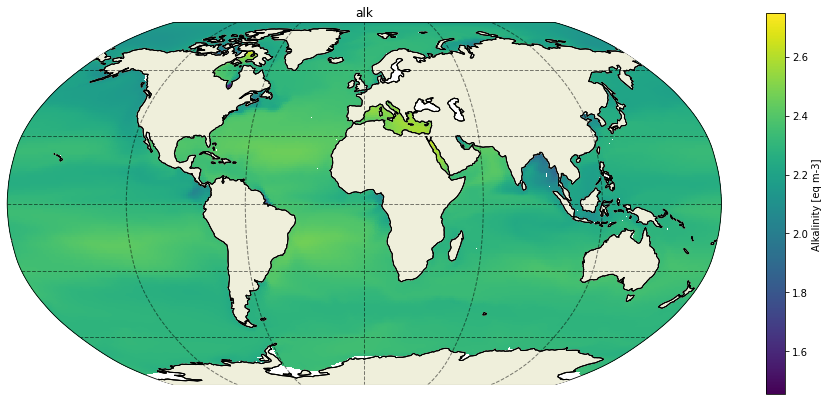

In [22]:
cubes = alks
title = 'alk'
standard_name = 'Alkalinity'
long_name = 'Alkalinity'
units = 'eq m-3'
depth = 0

dic_dataset = salt_dataset.copy()

cube_field  = dic_dataset.SALT.isel(time=0)
# mask to nan where hFacC(k=0) = 0
cube_field  = cube_field.where(grid.hFacC.isel(k=0))
cube_field = cube_field.isel(k=0)
cube_field.attrs['standard_name'] = standard_name
cube_field.attrs['long_name'] = long_name
cube_field.attrs['units'] = units

cube_field.isel(tile=0).data[:] = alks[0][2][depth,0:90,:].data.data
cube_field.isel(tile=1).data[:] = alks[0][2][depth,90:180,:].data.data
cube_field.isel(tile=2).data[:] = alks[0][2][depth,180:270,:].data.data

cube_field.isel(tile=3).data[:] = alks[1][2][depth,0:90,:].data.data
cube_field.isel(tile=4).data[:] = alks[1][2][depth,90:180,:].data.data
cube_field.isel(tile=5).data[:] = alks[1][2][depth,180:270,:].data.data

cube_field.isel(tile=6).data[:] = alks[2][2][depth,:,:].data.data

cube_field.isel(tile=7).data[:] = alks[3][2][depth,:,0:90].data.data
cube_field.isel(tile=8).data[:] = alks[3][2][depth,:,90:180].data.data
cube_field.isel(tile=9).data[:] = alks[3][2][depth,:,180:270].data.data

cube_field.isel(tile=10).data[:] = alks[4][2][depth,:,0:90].data.data
cube_field.isel(tile=11).data[:] = alks[4][2][depth,:,90:180].data.data
cube_field.isel(tile=12).data[:] = alks[4][2][depth,:,180:270].data.data

fig  = plt.figure(figsize=(16,7))
# ecco.plot_proj_to_latlon_grid(grid.XC, grid.YC, salt, show_colorbar=True, cmin=-1.5, cmax=1.5);plt.title('salt');
ecco.plot_proj_to_latlon_grid(grid.XC, grid.YC, cube_field, show_colorbar=True, );plt.title(title);
plt.savefig('/Users/ph290/Downloads/ecco4/'+title+'_plot.png')